<a href="https://colab.research.google.com/github/KuriaDan/IPW9/blob/master/IPW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question


Model 1: Learning from disaster - Build a machine learning algorithm to predict which passengers survived the shipwreck.

Model 2: perform a classification of mails as either spam or not.



### b) Defining the Metric for Success

Create models with accuracy scores of at least 85%.

## 2. Reading the Data

In [0]:
## Loading our libraries.
 # linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
#Visualization libraries
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as mno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier ## KNN classifier algorithm
from sklearn.model_selection import train_test_split ## Train and test split algorithm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score # Model performance metrics
from sklearn.naive_bayes import GaussianNB # Naive Bayes algorithm
from sklearn.preprocessing import Normalizer # For normalizing data to unit variance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # machine learning algorithm that can also be used as a feature reduction preprocessing tool.

In [0]:
# Loading the Dataset

titanic=pd.read_csv('titanic.csv')
spam=pd.read_csv('spambase_csv.csv')

## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
print(titanic.shape)
print(spam.shape)

(891, 12)
(4601, 58)


In [0]:
# Previewing the top of our dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
spam.shape

(4601, 58)

In [0]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [0]:
# Previewing the bottom of our dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [0]:
# Checking whether each column has an appropriate datatype
print('Titanic dataset data types')
print(titanic.dtypes)
print('\n')
print('****************************************')
print('\n')
print('Spamdata dataset data types')
print(spam.dtypes)

Titanic dataset data types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


****************************************


Spamdata dataset data types
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
wo

In [0]:
# Dropping columns in titanic dataset that we will not use in the analysis
#titanic=titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

## 4. Tidying the Datasets

### 4.1 Titanic Dataset

In [0]:
# Identifying the Missing Data
#
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

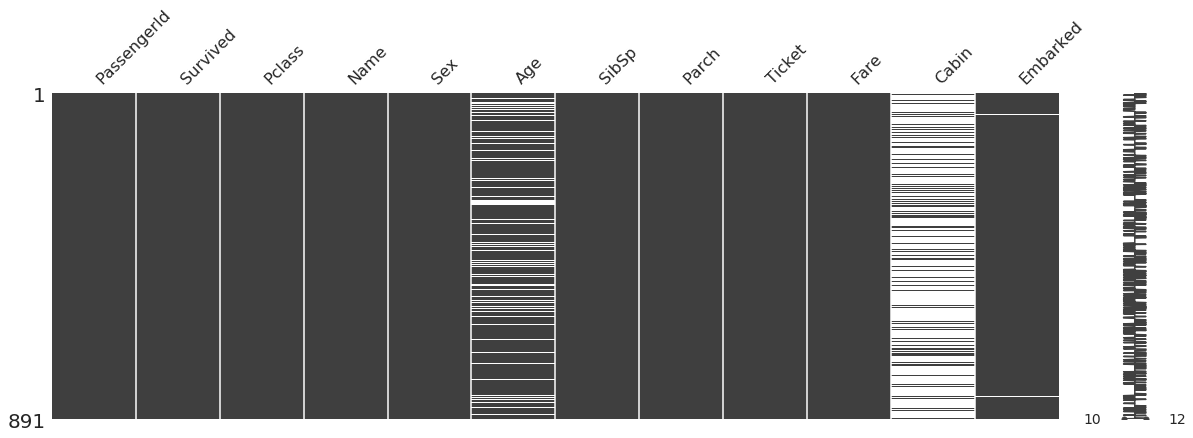

In [0]:
# Printing a matrix to find the location of each missing value in the dataset in each column.
mno.matrix(titanic, figsize = (20, 6))

In [0]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# Filling the embarked column's missing value with S as it's the most common port
titanic['Embarked'].fillna('S', inplace=True)

### 4.2 Spam Dataset

In [0]:
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

> The spam dataset has no null values

In [0]:
spam['class']=spam['class'].astype('category')

## 5. Exploratory Analysis

### 5.1 Titanic Dataset

Survived =  38.38383838383838
Did not survive =  61.61616161616161


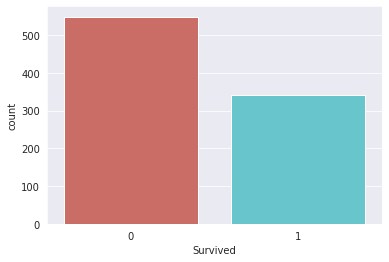

In [0]:
# Ploting the univariate summaries and recording our observations
sns.countplot(x='Survived', data=titanic, palette='hls')
count_nosur = len(titanic[titanic['Survived']==0])
count_sur = len(titanic[titanic['Survived']==1])
tot_psng = count_nosur+count_sur
pct_nosur = count_nosur/tot_psng
pct_sur = count_sur/tot_psng
print("Survived = ", pct_sur*100)
print("Did not survive = ", pct_nosur*100)

> 38% of the people in Titanic survived while 61% did not survive

In [0]:
titanic.groupby('Sex'). mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


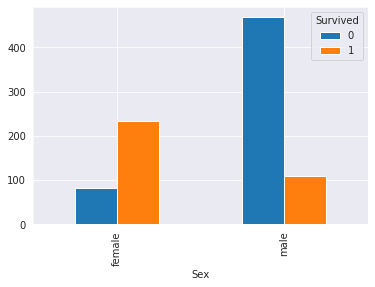

In [0]:
pd.crosstab(titanic.Sex, titanic.Survived).plot(kind='bar')

> A higher proportion of Female passengers survived while a higher proportion of male passengers died.


In [0]:
pd.crosstab(titanic.Pclass, titanic.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


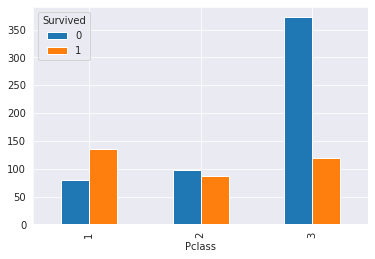

In [0]:
pd.crosstab(titanic.Pclass, titanic.Survived).plot(kind='bar')

> A high proportion of passengers in first class survived while those in 3rd class didn't. This is because they were given preferential treatment in lifeboat allocation.

In [0]:

pd.crosstab([titanic.Sex, titanic.Survived], titanic.Pclass, margins = True).style.background_gradient(cmap='summer_r')

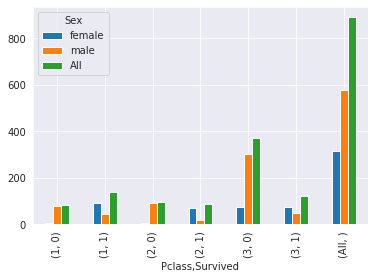

In [0]:

pd.crosstab([titanic.Pclass, titanic.Survived], titanic.Sex, margins = True).plot(kind='bar')

> A high proportion of female passengers in first and second class survived while a high proportion of male passengers did not. This could have been as a result of preferential treatment in lifeboat allocation or chivalrous acts by the men.

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Extrcting the passenger's title from the name column.
titanic['Initial']=0
for i in titanic:
    #Extracting the strings before fullstop and adding them to the initial column.
    titanic['Initial'] = titanic.Name.str.extract('([A-Za-z]+)\.')

In [0]:
pd.crosstab(titanic.Initial,titanic.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
# Grouping the titles and replacing them into 4 broad categories.
titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [0]:
titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [0]:
# Replacing the null valuesin the age column with the average age of the four broad categories created above.
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=4
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=35
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age']=47

In [0]:
titanic.Age.isnull().any()

False

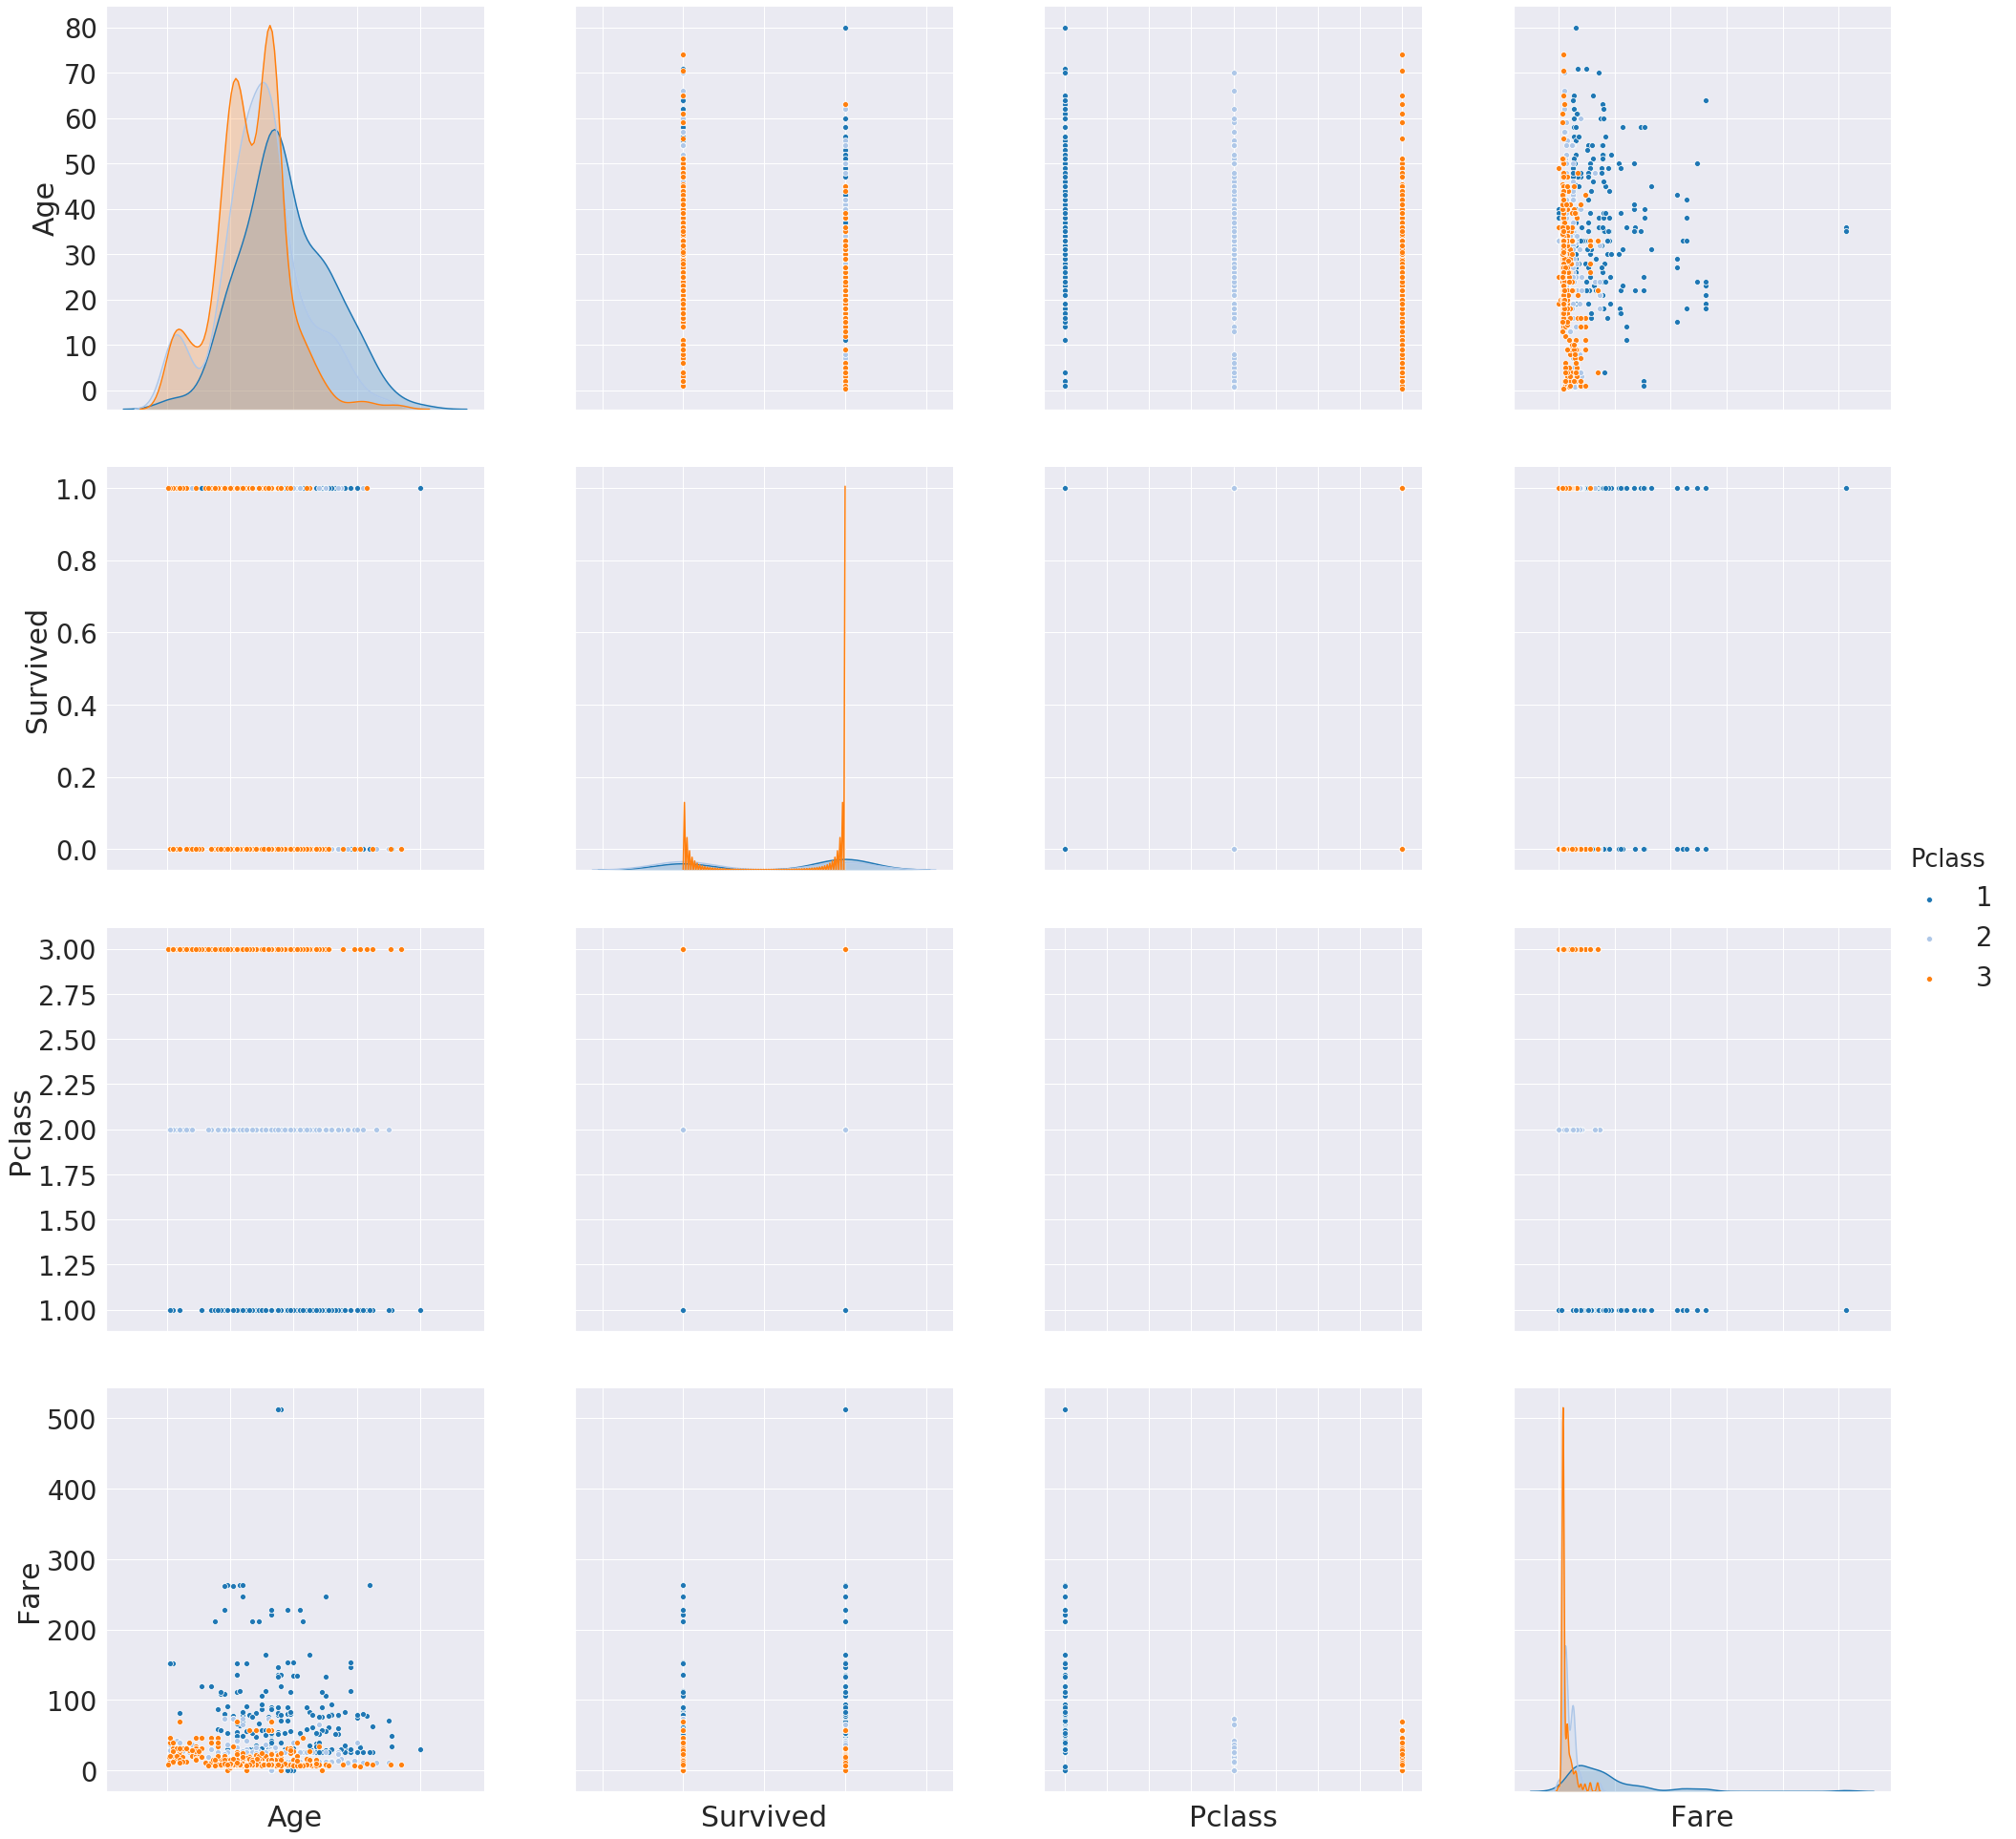

In [0]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(titanic[['Age','Survived','Pclass','Sex','Fare']], 
                 hue='Pclass', palette='tab20',size=7)
g.set(xticklabels=[]);

> From the pairplot we can hypothesize that those if first class paid the highest fares, most of the survivors were first class passengers and a high proportion ofthose that paid the highest fares were the oldest.

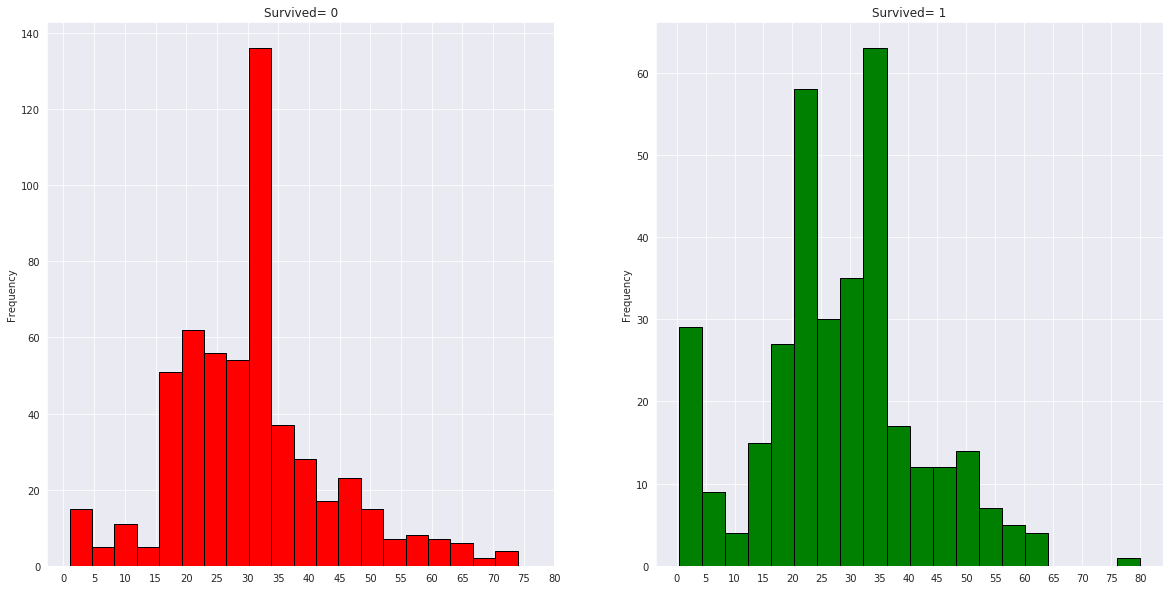

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

> From the above plot we can hypothesize that a high proportion of passengers aged 50 and over died in the tragedy.

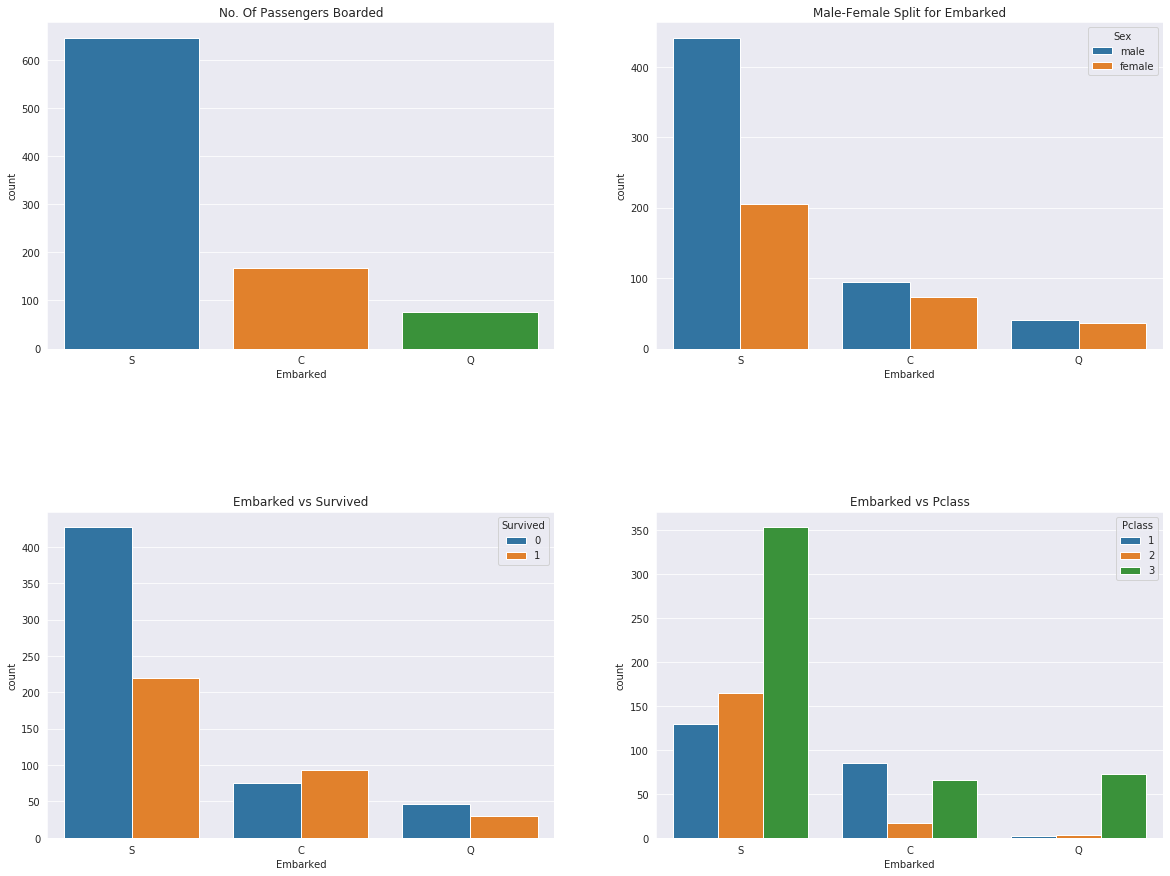

In [0]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=titanic,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=titanic,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=titanic,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=titanic,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

>Most of the passengers embarked from the Southampton port, most of them were male and a high proportion of them did not survive.
> also, most of passengers that embarked from the C port were first class passengers.

In [0]:
pd.crosstab(titanic.Parch,titanic.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


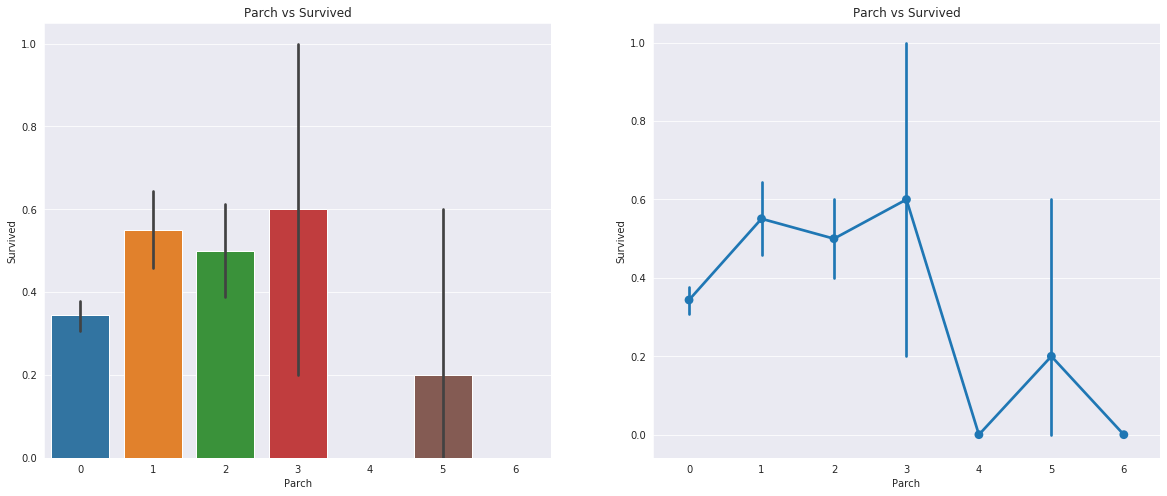

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=titanic,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=titanic,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [0]:
print("Highest fare was: ", titanic['Fare'].max())
print("Lowest fare was: ", titanic['Fare'].min())
print("Average fare was: ", titanic['Fare'].mean())

Highest fare was:  512.3292
Lowest fare was:  0.0
Average fare was:  32.204207968574636


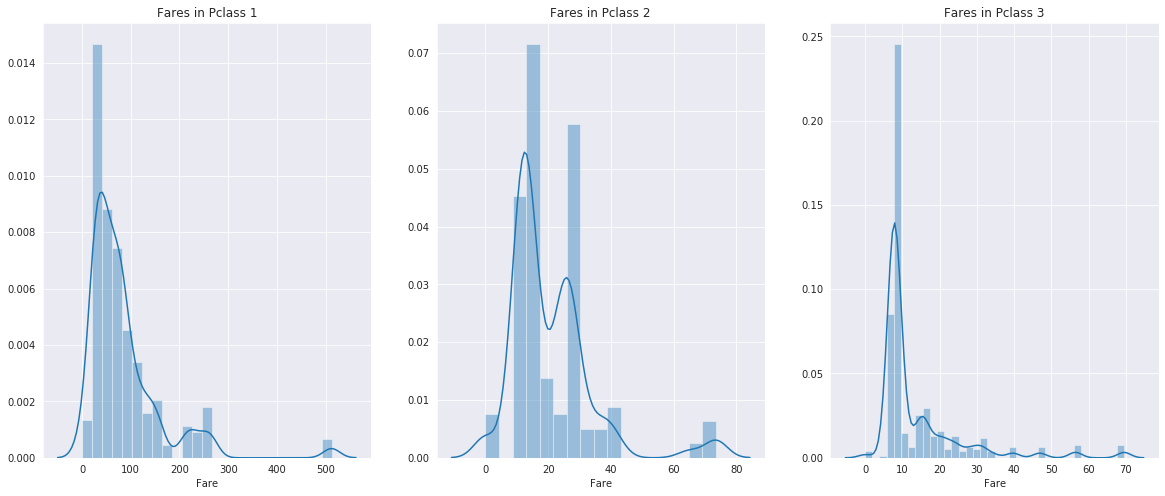

In [0]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic[titanic['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(titanic[titanic['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(titanic[titanic['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

> Passengers in first class paid the highest fares while those in third class paid the least.

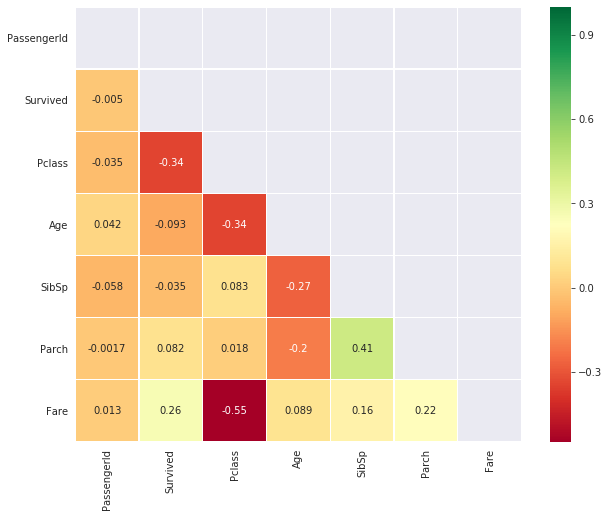

In [0]:
# Correlation matrix of the numerical variables
mask=np.zeros_like(titanic.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, mask=mask)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

> From the correlation matrix, none of our features are highly correlated with each other.

In [0]:
# Creating a column of the respective age band with an age band of 16 years
titanic['Age_band']=0
titanic.loc[titanic['Age']<=16,'Age_band']=0
titanic.loc[(titanic['Age']>16)&(titanic['Age']<=32),'Age_band']=1
titanic.loc[(titanic['Age']>32)&(titanic['Age']<=48),'Age_band']=2
titanic.loc[(titanic['Age']>48)&(titanic['Age']<=64),'Age_band']=3
titanic.loc[titanic['Age']>64,'Age_band']=4
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [0]:
titanic['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


> most of the passengers were in the first and seond age band.

In [0]:
titanic['Family_Size']=0
titanic['Family_Size']=titanic['Parch']+titanic['SibSp']#family size
titanic['Alone']=0
titanic.loc[titanic.Family_Size==0,'Alone']=1#Alone


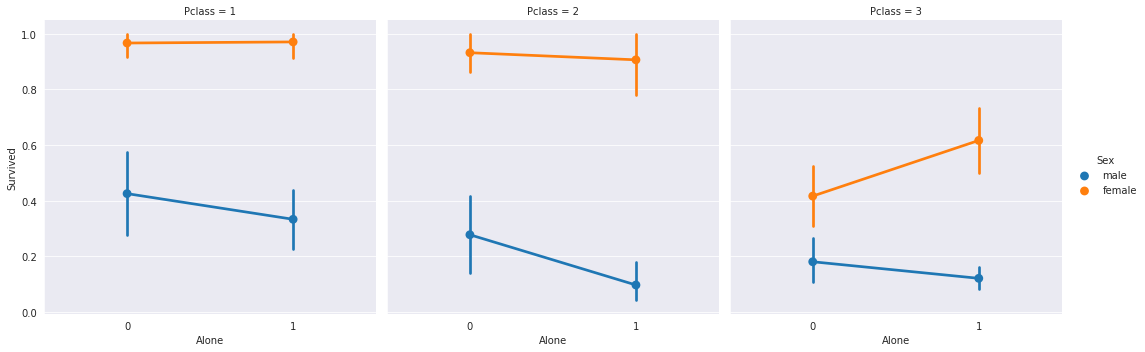

In [0]:
sns.factorplot('Alone','Survived',data=titanic,hue='Sex',col='Pclass')
plt.show()

> Most of the female passengers in third class who were alone survived the tragedy, while most of male passengers in first and second classes who were alone did not survive.

In [0]:
# Creating a fare range column of the fare column subdivided into 4 categories.
titanic['Fare_Range']=pd.qcut(titanic['Fare'],4)
titanic.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
# Creating a fare category column consisting of the amount of fare passengers paid established above.
def fare_cat(x):
    for cat in titanic.Fare_Range:
        if cat == '(-0.001, 7.91]':
            return 0
        elif cat == '(7.91, 14.454]':
            return 1
        elif cat == '(14.454, 31.0]':
            return 2
        else:
            return 3
        
titanic['Fare_cat']=titanic['Fare_Range'].apply(lambda x: fare_cat(x))

In [0]:
# Dropping irrelevant columns
titanic.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [0]:
# Changing the columns to their appropriate data types.
titanic[['Sex', 'Embarked', 'Initial', 'Age_band', 'Fare_cat', 'Pclass']]=titanic[['Sex', 'Embarked', 'Initial', 'Age_band', 'Fare_cat', 'Pclass']].astype('category')

In [0]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,male,1,0,S,Mr,1,1,0,3
1,1,1,female,1,0,C,Mrs,2,1,0,3
2,1,3,female,0,0,S,Miss,1,0,1,3
3,1,1,female,1,0,S,Mrs,2,1,0,3
4,0,3,male,0,0,S,Mr,2,0,1,3


### 5.2 Spam Dataset

In [0]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


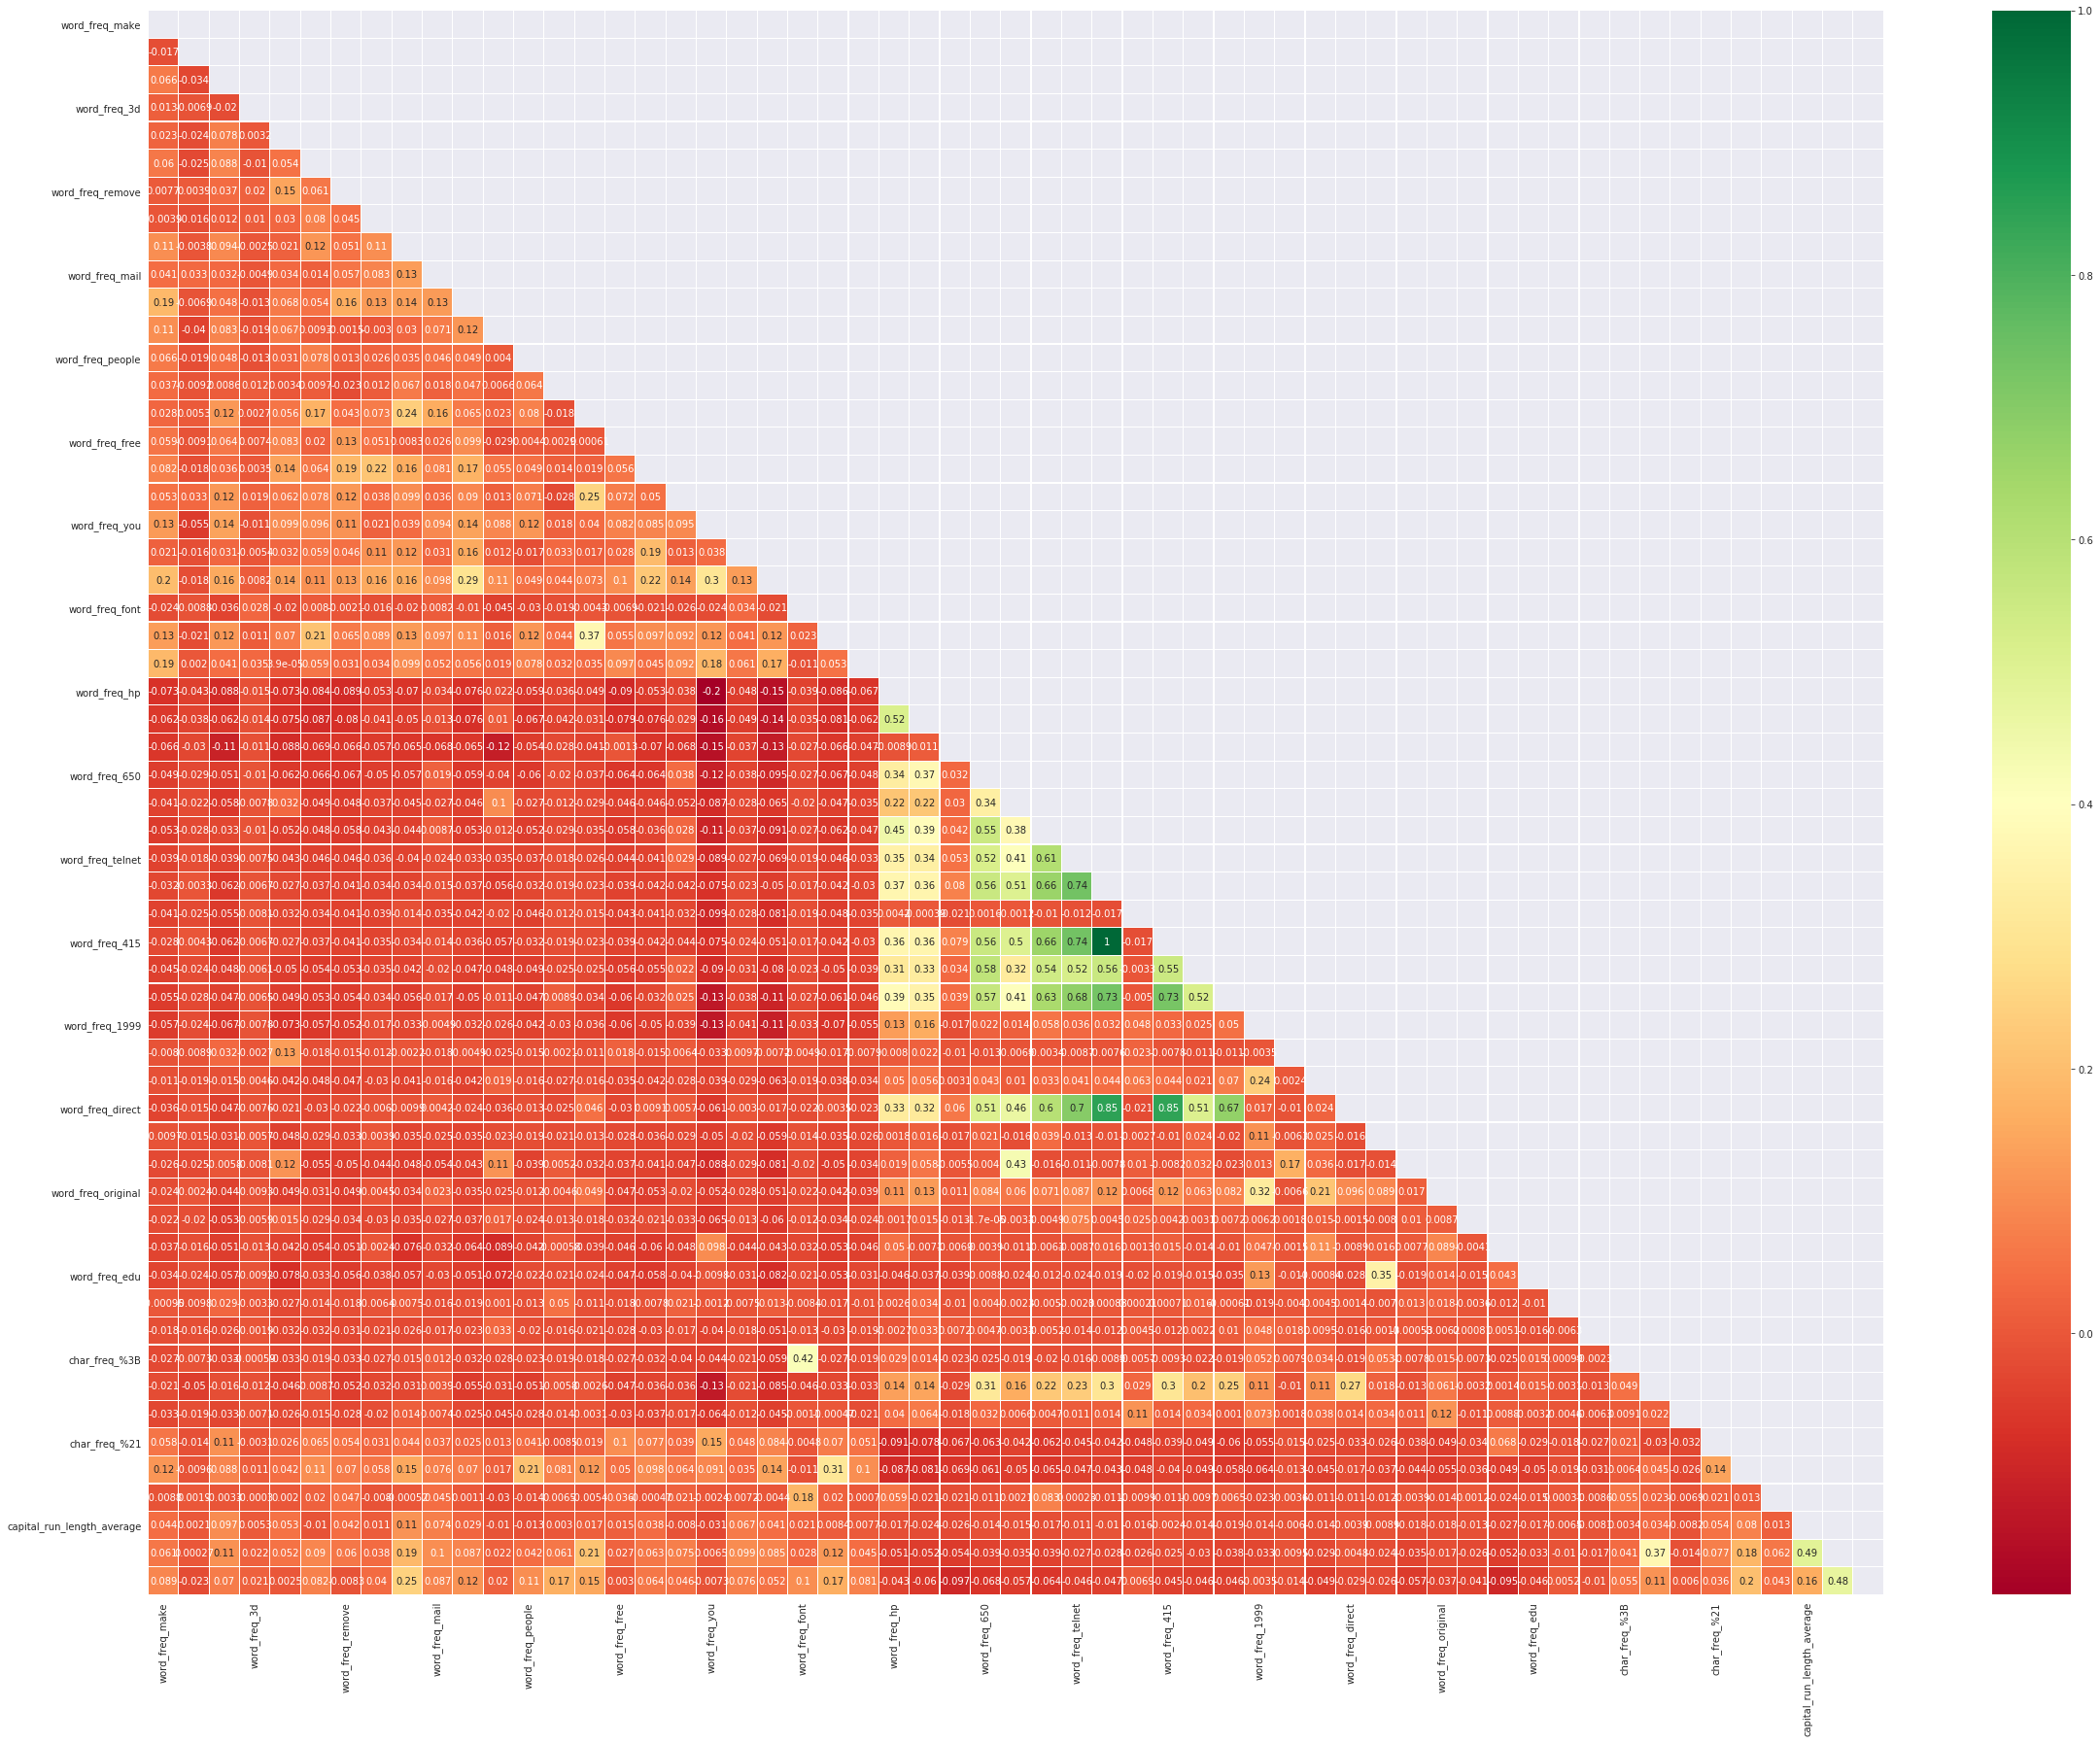

In [0]:
mask=np.zeros_like(spam.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(spam.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, mask=mask)
fig=plt.gcf()
fig.set_size_inches(40,30)
plt.show()

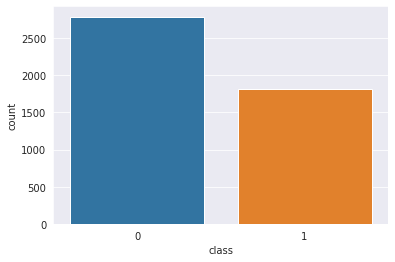

In [0]:
sns.countplot(x='class', data=spam)

> most of the data points in the dataset are for text that was classified as ham.
> Since the dataset has been preprocessed from the original text to word frequencies, no other insights were gained from the EDA

## 6. Implementing the Solution

### 6.1 Titanic dataset K-nearest neighbor classification model.

In [0]:
# Splitting the independent and dependent variables.
a=titanic.drop('Survived', axis=1)
# One hot encoding the categorical variables.
a=pd.get_dummies(a)
# The dependent variable is the survived column.
b=titanic['Survived']
# Training the model with 30% of our dataset
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=0, stratify=b)
titanic_classifier=KNeighborsClassifier().fit(x_train, y_train)
# Predicting our test data from the above trained model.
y_pred=titanic_classifier.predict(x_test)
# Scoring metrics.
cm=confusion_matrix(y_test, y_pred)
cl=classification_report(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print(cm)
print(cl)
print(acc)

[[147  18]
 [ 34  69]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       165
           1       0.79      0.67      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268

0.8059701492537313


#### 6.1.1 KNN Hyper parameter tuning 

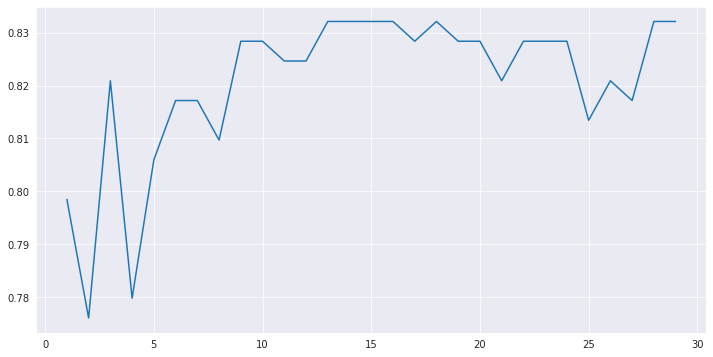

In [0]:
# n_neighbours tuning
# creating a list of n_neighbours from 1 to 30.
neighbours = list(np.arange(1,30))
# Creating an empty list where the respective model score is stored.
ac = pd.Series()
# splitting the dataset into train and test splits
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=0, stratify=b)
# iterating the KNN classifier model each time with n n_neighbours and appending the score in the above list.
for n in neighbours:
    model=KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    ac=ac.append(pd.Series(accuracy))
plt.plot(neighbours, ac)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


In [0]:
results_df=pd.DataFrame({'Neighbours' : neighbours, 'Accuracy': ac})
results_df

,Neighbours,Accuracy
0,1,0.798507
0,2,0.776119
0,3,0.820896
0,4,0.779851
0,5,0.805970
0,6,0.817164
0,7,0.817164
0,8,0.809701
0,9,0.828358
0,10,0.828358


> Model with 13 Nearest Neighbours yielded the highest accuracy score.

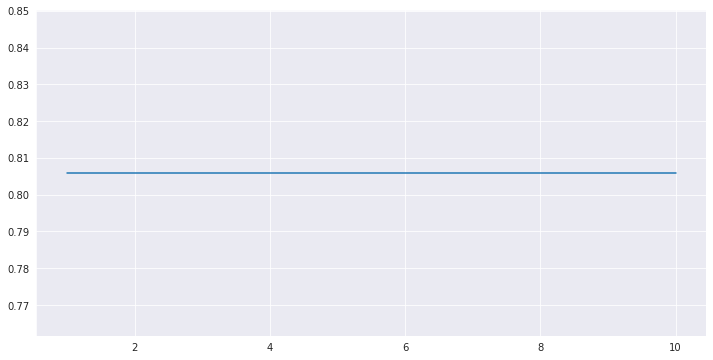

In [0]:
# p in L_p distance tuning
distance=[1,2,3,4,5,6,7,8,9,10]
result=pd.Series()
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=0, stratify=b)
for p in distance:
    model_1=KNeighborsClassifier(p=p).fit(x_train, y_train)
    pred_1=model_1.predict(x_test)
    acc_1=accuracy_score(y_test, pred_1)
    result=result.append(pd.Series(acc_1))
plt.plot(distance, result)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()    

In [0]:
results_df1=pd.DataFrame({'Minkowski distance' : distance, 'Accuracy': acc_1})
results_df1

> Minkowski hyper parameter tuning does not yield any improvement in the model's performance

In [0]:
# Final Hyperparameter tuned model.
# Training the model with 30% of our dataset
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=0, stratify=b)
titanic_classifier=KNeighborsClassifier(n_neighbors=13).fit(x_train, y_train)
# Predicting our test data from the above trained model.
y_pred=titanic_classifier.predict(x_test)
# Scoring metrics.
cm=confusion_matrix(y_test, y_pred)
cl=classification_report(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print(cm)
print(cl)
print(acc)

[[153  12]
 [ 33  70]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       165
           1       0.85      0.68      0.76       103

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268

0.832089552238806


### 6.2 Naive Bayes Classifier Spam dataset

In [3]:
# First model with 80-20 train and test size split.
x=spam.drop('class', axis=1)
y=spam['class']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
spam_model=GaussianNB().fit(x_train, y_train)
y_pred=spam_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
print(accuracy)
print(matrix)

0.8447339847991314
[[428 130]
 [ 13 350]]


In [4]:
# second model with 70:30 train and test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
spam_model=GaussianNB().fit(x_train, y_train)
y_pred=spam_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
print(accuracy)
print(matrix)

0.8298334540188269
[[627 210]
 [ 25 519]]


In [5]:
# Third model with 60:40 train test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=0, stratify=y)
spam_model=GaussianNB().fit(x_train, y_train)
y_pred=spam_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
print(accuracy)
print(matrix)

0.8299837045084193
[[835 281]
 [ 32 693]]


In [0]:
spam_model.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [0]:
# Model tuning: Normalizing the data.
x=Normalizer().transform(x)
# second model with 70:30 train and test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
spam_model=GaussianNB().fit(x_train, y_train)
y_pred=spam_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
print(accuracy)
print(matrix)

0.7711803041274439
[[542 295]
 [ 21 523]]


In [6]:
!pip install imblearn

In [0]:
from imblearn.over_sampling import SMOTE

In [9]:
# Model tuning: Oversampling using SMOTE
# second model with 70:30 train and test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
spam_model=GaussianNB().fit(x_train, y_train)
y_pred=spam_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
print(accuracy)
print(matrix)

0.8298334540188269
[[630 207]
 [ 28 516]]


> oversampling did not increase the model's performance

In [12]:
# Model tuning: Dimensionality reduction with LDA
# second model with 70:30 train and test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
lda=LinearDiscriminantAnalysis(n_components=2
                               )
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

spam_model=GaussianNB().fit(x_train, y_train)
y_pred=spam_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
print(accuracy)
print(matrix)

0.9015206372194062
[[796  41]
 [ 95 449]]


> After applying linear discriminant analysis to our data as a dimensionality reduction technique, accuracy increased from 83% to 90%.

## 8. Challenging the solution

> Model 1 achieved an accuracy of 83% which was slightly below the 85% target. however, other models like gradient boosted trees would achieve higher scores than KNN.
> Model 2 achieved an accuracy of 90%. This exceeded the above set metric for success. However, the feature preprocessing applied on the original data is alien to us and am sure provided the original dataset, a higher accuracy score would be achieved.




